In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_excel('/Users/mgoli1/Documents/P/Programming/My Practice/roads.xlsx')
data.head(5)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,StringId,X,Y,Z,Width
0,1,9230596,9.689200e+03,1086093,10
1,1,921115986293646,9.689835e+13,108717692251528,10
2,1,920003373601709,9.687071e+13,108721540899771,10
3,1,918934958289589,9.688243e+14,108725402281341,10
4,1,9174014836565,9.686706e+14,108700373334437,10


In [3]:
# Extract the coordinates and width from the columns
x = data.X
y = data.Y
z = data.Z
width = data.Width

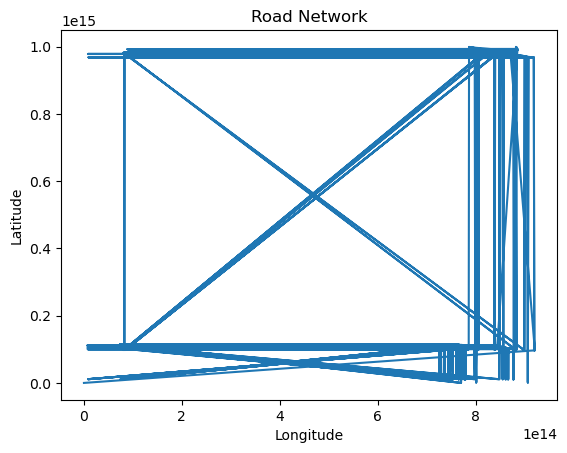

In [4]:
# Plot the road
plt.plot(x, y)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Road Network')
plt.show()

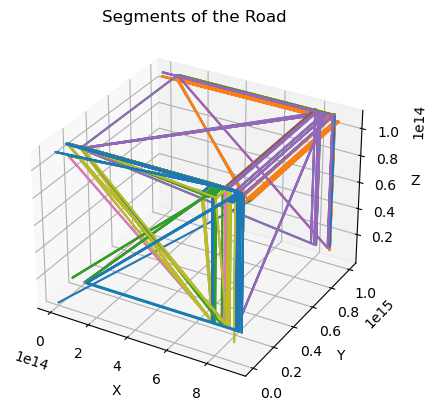

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


data = pd.read_excel('/Users/mgoli1/Documents/P/Programming/My Practice/roads.xlsx')
df = pd.DataFrame(data)

# Group the data by StringId
segments = df.groupby('StringId')

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each segment separately
for name, segment in segments:
    ax.plot(segment['X'], segment['Y'], segment['Z'])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Segments of the Road')

plt.show()


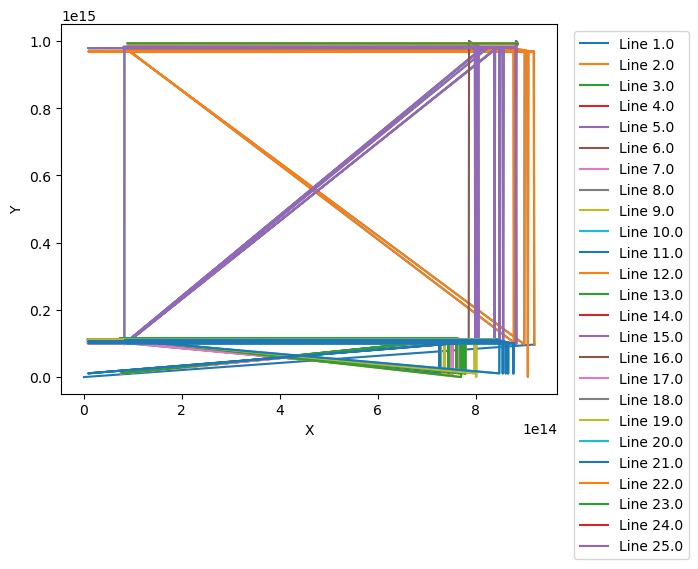

In [5]:
# Create a 2D plot based on Amin's Code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class LineNode:
    def __init__(self, id, lineset, neighbors):
        self.id = id
        self.lineset = lineset
        self.neighbors = neighbors

class LineGraph:
    def __init__(self):
        self.nodes = {}

    def insert_linenode(self, linenode):
        self.nodes[linenode.id] = linenode

    def get_node(self, id):
        return self.nodes[id]

def read_linesets():
    
    road_points_df = pd.read_excel('/Users/mgoli1/Documents/P/Programming/My Practice/roads.xlsx', header=None)
    road_points_df = road_points_df.apply(pd.to_numeric, errors='coerce')

    linesets = {}
    nodes = {}

    for group_id, group in road_points_df.groupby(0):
        points = group.iloc[:, 1:].to_numpy()
        lines = [[i, i+1] for i in range(len(points)-1)]

        linesets[group_id] = points

        nodes[group_id] = LineNode(group_id, linesets[group_id], set())

    for id, linenode in nodes.items():
        lineset = linenode.lineset

        for other_id, other_linenode in nodes.items():
            if other_id == id or other_id in linenode.neighbors:
                continue

            points_one = linenode.lineset
            points_two = other_linenode.lineset

            if np.array_equal(points_one, points_two):
                linenode.neighbors.add(other_id)
                other_linenode.neighbors.add(id)

    graph = LineGraph()
    graph.nodes = nodes

    return graph


linesets = read_linesets()

for node_id, linenode in linesets.nodes.items():
    points = linenode.lineset
    plt.plot(points[:, 0], points[:, 1], label=f"Line {node_id}")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()
